# **Project Part 1**

# **1.1. Dataset Description and Features**
# 1. Identify your dataset: Briefly describe the dataset you&#39;ve chosen. Where did you find it? What is the topic or domain?

-> The dataset contains sales data of electronic products on Amazon, sourced from Kaggle. It includes user ratings for various electronics items along with metadata such as the item's category, brand, and the timestamp of the transaction. The domain of this dataset lies in e-commerce and customer behavior analysis. (https://www.kaggle.com/datasets/edusanketdk/electronics) 

# 2. Features: List and describe the features (columns) within the dataset. What type of data is each feature (numerical, categorical, text)?

-> Features: 

The dataset includes the following features:

1. **item_id** (Numerical):   A unique identifier for each product.
2. **user_id** (Numerical):   A unique identifier for each user who purchased an item.
3. **rating** (Numerical):    The user rating given to the item (e.g., on a scale of 1 to 5).
4. **timestamp** (Text/Datetime): The date and time of the purchase. It can be converted into a datetime format for time-series analysis.
5. **model_attr** (Categorical): Despite the name, this column contains values like male and female, which suggests it may represent the gender of the user rather than item-related attributes. This is an ambiguous attribute.
6. **category** (Categorical): The category of the electronic item (e.g., Headphones, Computers & Accessories).
7. **brand** (Categorical): The brand of the item (e.g., Etre Jeune, Apple).
8. **year** (Numerical): The year of purchase, useful for trend analysis.
9. **user_attr** (Categorical): Also seems to represent user-related information.
10. **split** (Numerical): Likely used to divide data into training, validation, or testing sets. May not hold analytical value on its own.    int64

# **1.2. Preprocessing with Pandas**
# 1. **Import libraries**: Begin your Python code by importing pandas and other require libraries

In [2]:
import pandas as pd

# 2. **Load the data**: Use pandas functions (pd.read_csv(), pd.read_excel(), etc.) to load your dataset into a pandas DataFrame.

In [20]:
data = pd.read_csv("electronics.csv")

In [7]:
data

,item_id,user_id,rating,timestamp,model_attr,category,brand,year,user_attr,split
0,0,0,5.0,1999-06-13,Female,Portable Audio & Video,NaN,1999,NaN,0
1,0,1,5.0,1999-06-14,Female,Portable Audio & Video,NaN,1999,NaN,0
2,0,2,3.0,1999-06-17,Female,Portable Audio & Video,NaN,1999,NaN,0
3,0,3,1.0,1999-07-01,Female,Portable Audio & Video,NaN,1999,NaN,0
4,0,4,2.0,1999-07-06,Female,Portable Audio & Video,NaN,1999,NaN,0
...,...,...,...,...,...,...,...,...,...,...
1292949,9478,1157628,1.0,2018-09-26,Female,Headphones,Etre Jeune,2017,NaN,0
1292950,9435,1157629,5.0,2018-09-26,Female,Computers & Accessories,NaN,2017,NaN,0
1292951,9305,1157630,3.0,2018-09-26,Female,Computers & Accessories,NaN,2016,NaN,0
1292952,9303,1157631,5.0,2018-09-29,Male,Headphones,NaN,2018,NaN,0


# 3. **Missing values**: Identify and handle missing values. You can choose to remove rows/columns with missing values, impute missing values with statistical methods (mean/median), or utilize other techniques.

In [9]:
data.isnull().sum()

item_id             0
user_id             0
rating              0
timestamp           0
model_attr          0
category            0
brand          961834
year                0
user_attr     1118830
split               0
dtype: int64

In [21]:
# Drop 'user_attr' due to excessive missing values

data = data.drop(columns=['user_attr'])

In [22]:
# Impute missing 'brand' values with 'Unknown'

data['brand'] = data['brand'].fillna('Unknown')

In [23]:
data.head(5)

,item_id,user_id,rating,timestamp,model_attr,category,brand,year,split
0,0,0,5.0,1999-06-13,Female,Portable Audio & Video,Unknown,1999,0
1,0,1,5.0,1999-06-14,Female,Portable Audio & Video,Unknown,1999,0
2,0,2,3.0,1999-06-17,Female,Portable Audio & Video,Unknown,1999,0
3,0,3,1.0,1999-07-01,Female,Portable Audio & Video,Unknown,1999,0
4,0,4,2.0,1999-07-06,Female,Portable Audio & Video,Unknown,1999,0


# 4. **Outliers**: Explore the presence of outliers in your data. You can use visualizations (boxplots) or statistical methods (IQR) to identify them. Decide on a strategy to handle outliers (removal, capping, etc.).

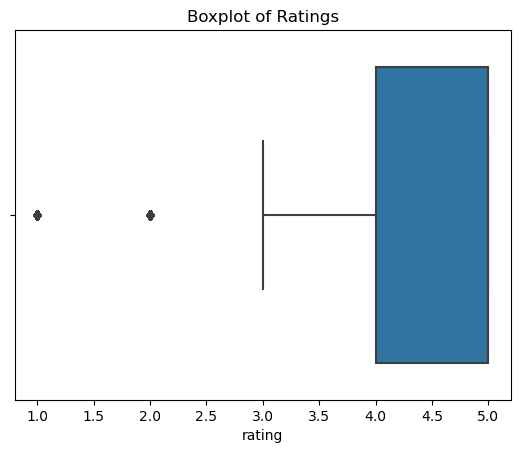

In [25]:
# Boxplot for 'rating' to see the outliers

sns.boxplot(x=data['rating'])
plt.title("Boxplot of Ratings")
plt.show()


In [26]:
Q1 = data['rating'].quantile(0.25)
Q3 = data['rating'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = data[(data['rating'] < lower_bound) | (data['rating'] > upper_bound)]
print(f"Number of outliers in rating: {outliers.shape[0]}")

Number of outliers in rating: 222403


In [ ]:
# still we cannot remove the outliers as need the ratings of all the products.

# 5. **Data Type Conversion**: If necessary, convert features to appropriate data types (e.g., numerical to numeric, text to categorical).

In [10]:
data.dtypes

item_id         int64
user_id         int64
rating        float64
timestamp      object
model_attr     object
category       object
brand          object
year            int64
user_attr      object
split           int64
dtype: object

In [30]:
data['timestamp'] = pd.to_datetime(data['timestamp'])

,item_id,user_id,rating,timestamp,model_attr,category,brand,year,split
0,0,0,5.0,1999-06-13,Female,Portable Audio & Video,Unknown,1999,0
1,0,1,5.0,1999-06-14,Female,Portable Audio & Video,Unknown,1999,0
2,0,2,3.0,1999-06-17,Female,Portable Audio & Video,Unknown,1999,0
3,0,3,1.0,1999-07-01,Female,Portable Audio & Video,Unknown,1999,0
4,0,4,2.0,1999-07-06,Female,Portable Audio & Video,Unknown,1999,0


In [32]:
data[['model_attr', 'category', 'brand']] = data[['model_attr', 'category', 'brand']].astype('category')


In [34]:
data.dtypes

item_id                int64
user_id                int64
rating               float64
timestamp     datetime64[ns]
model_attr          category
category            category
brand               category
year                   int64
split                  int64
dtype: object

# 6. **Dimensionality**: Print the shape of the DataFrame to understand the number of rows (samples) and columns (features).

In [29]:
print(f"Dataset Shape: {data.shape}")

Dataset Shape: (1292954, 9)


In [9]:
#checking for  duplicates

data.duplicated().sum()

0

# 7. **Descriptive Statistics**: Use pandas functions (.describe()) to obtain summary statistics for numerical features (mean, standard deviation, etc.).

In [27]:
data.describe()

,item_id,user_id,rating,year,split
count,1.292954e+06,1.292954e+06,1.292954e+06,1.292954e+06,1.292954e+06
mean,4.183588e+03,5.605127e+05,4.051482e+00,2.012938e+03,1.747587e-01
std,2.525346e+03,3.342374e+05,1.379732e+00,2.643513e+00,5.506810e-01
min,0.000000e+00,0.000000e+00,1.000000e+00,1.999000e+03,0.000000e+00
25%,2.018000e+03,2.697482e+05,4.000000e+00,2.012000e+03,0.000000e+00
50%,3.930000e+03,5.518920e+05,5.000000e+00,2.014000e+03,0.000000e+00
75%,6.289000e+03,8.474858e+05,5.000000e+00,2.015000e+03,0.000000e+00
max,9.559000e+03,1.157632e+06,5.000000e+00,2.018000e+03,2.000000e+00


# **3. Data Visualization with Matplotlib**
1. Numerical Features: Create histograms or boxplots to visualize the
distribution of numerical features. Do they appear normally distributed?
Are there any skews or outliers?
2. Categorical Features: Create bar charts or pie charts to explore the
distribution of categorical features. What are the most frequent
categories?

3. Scatter Plots: Create scatter plots to visualize the relationship between
two numerical features. Do you observe any linear trends or correlations?
4. Pair Plots: Utilize libraries like seaborn to create pair plots, which display
relationships between all features in a matrix.

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

F:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


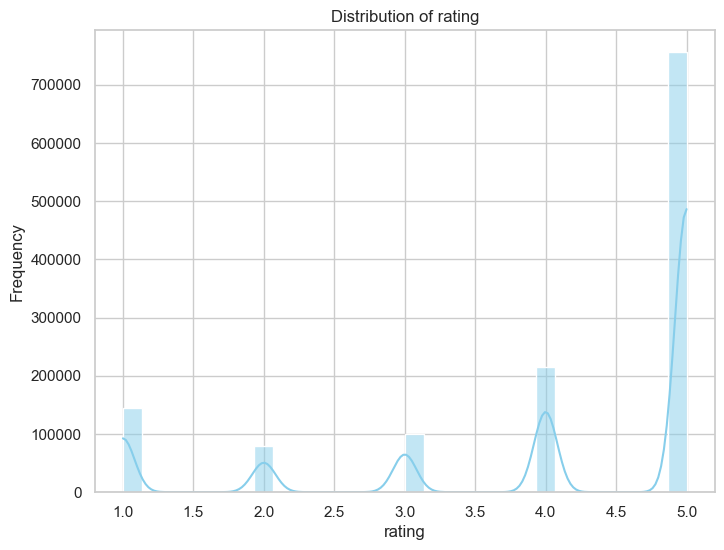

F:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


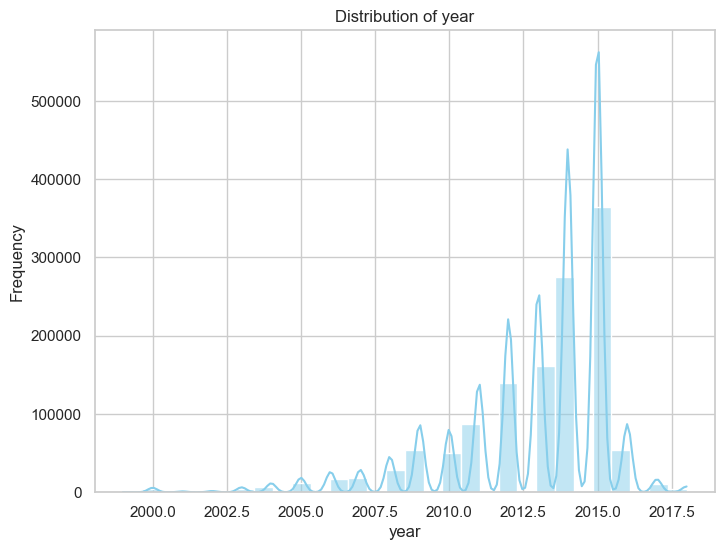

In [47]:
# Set style

sns.set(style="whitegrid")

# Numerical columns to visualize
num_cols = ['rating', 'year']

# Plot histograms

for col in num_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


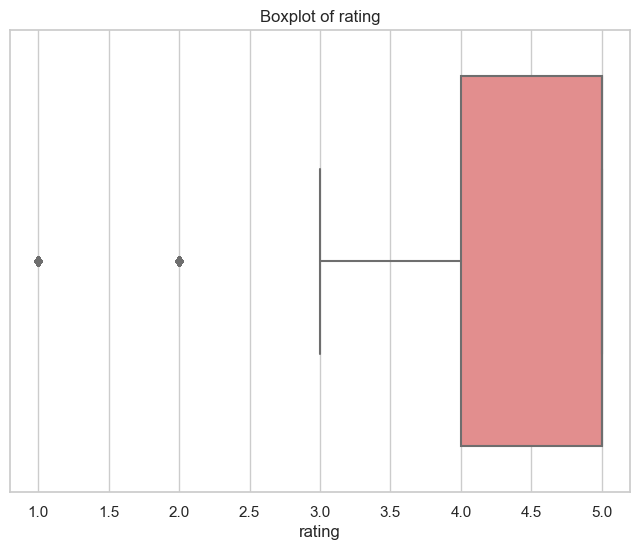

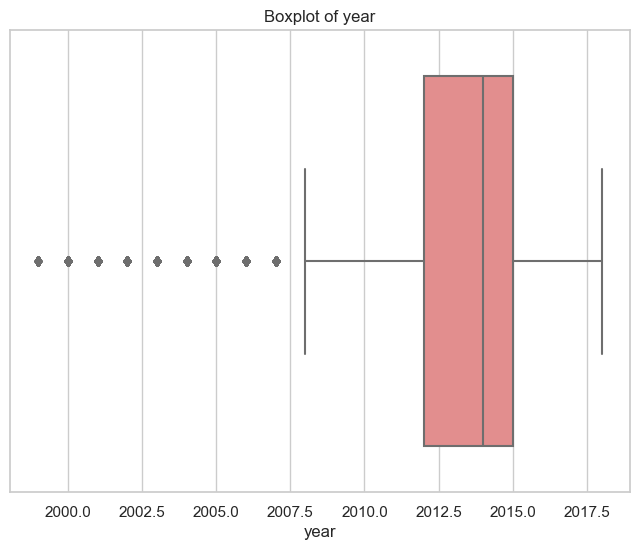

In [48]:
# Boxplots to check outliers
for col in num_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=data[col], color='lightcoral')
    plt.title(f'Boxplot of {col}')
    plt.show()


F:\anaconda\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


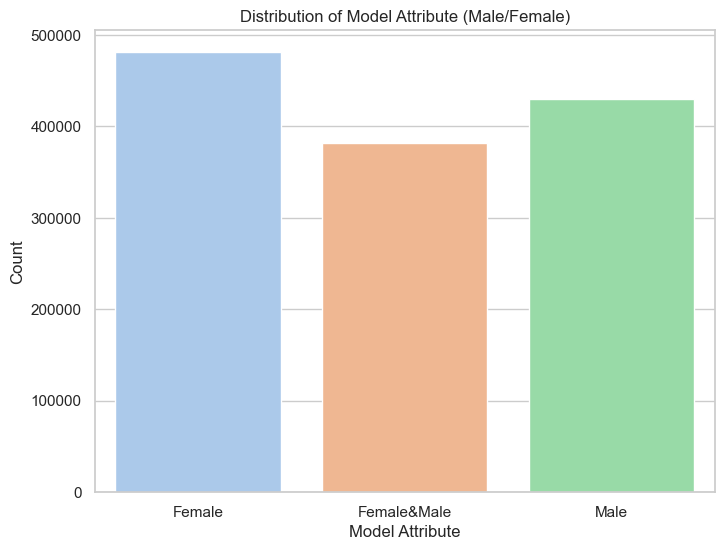

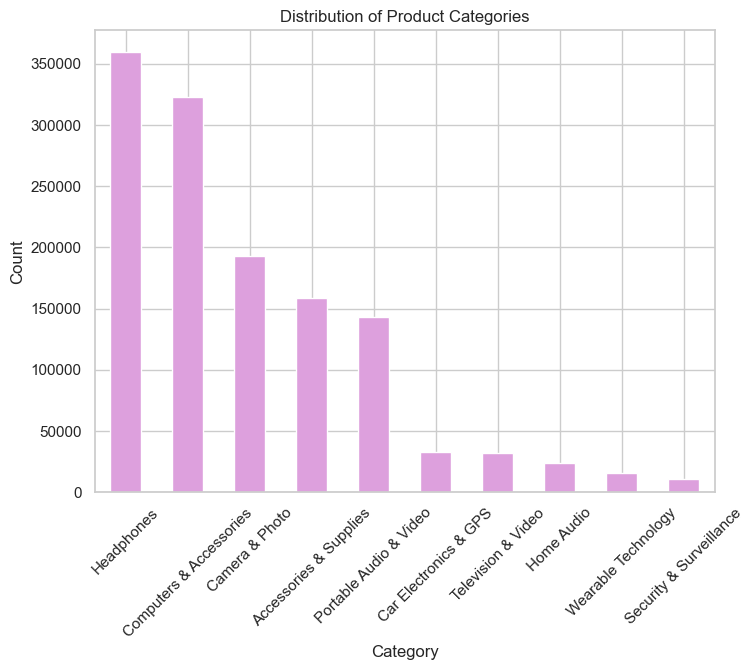

In [53]:
# Bar chart for model_attr

plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='model_attr', palette='pastel')
plt.title('Distribution of Model Attribute (Male/Female)')
plt.xlabel('Model Attribute')
plt.ylabel('Count')
plt.show()

# Bar chart for category

plt.figure(figsize=(8, 6))
data['category'].value_counts().plot(kind='bar', color='plum')
plt.title('Distribution of Product Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


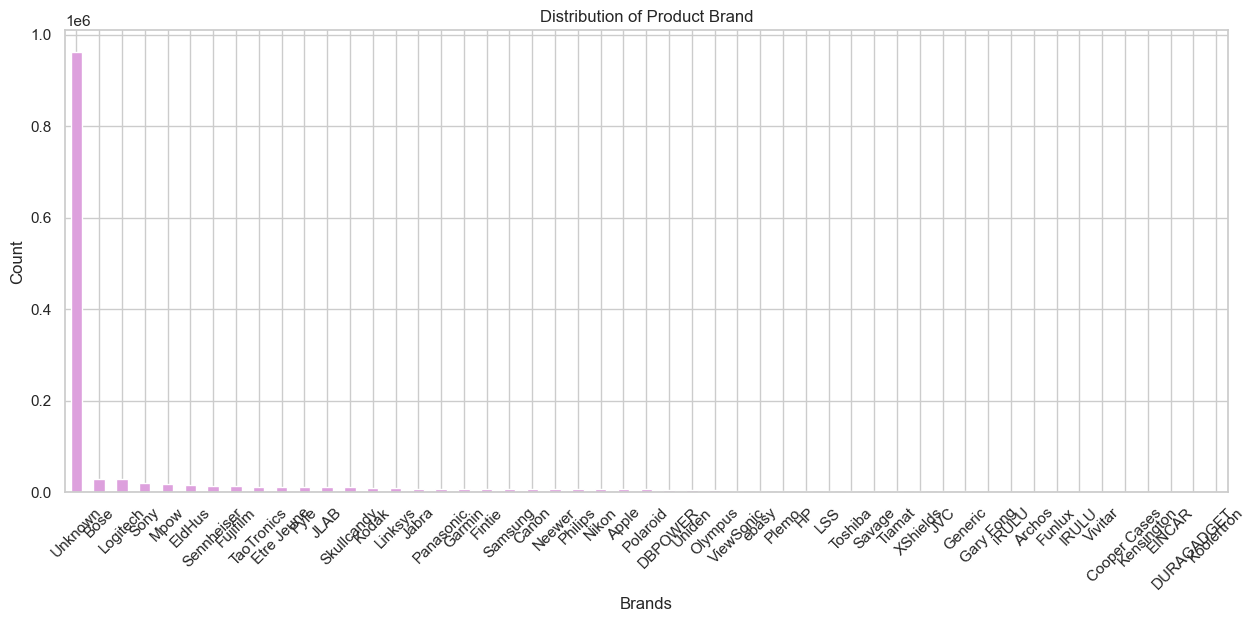

In [56]:
# Bar chart for brand
# brand has alot of missing values so might not be very helpful

plt.figure(figsize=(15, 6))
data['brand'].value_counts().plot(kind='bar', color='plum')
plt.title('Distribution of Product Brand')
plt.xlabel('Brands')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

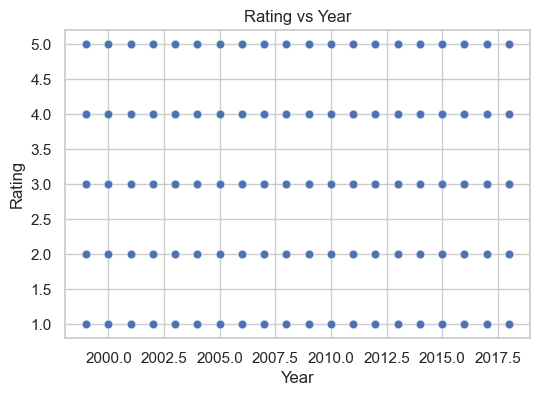

In [44]:
# Scatter plot: rating vs year

plt.figure(figsize=(6, 4))
sns.scatterplot(data=data, x='year', y='rating', alpha=0.3)
plt.title('Rating vs Year')
plt.xlabel('Year')
plt.ylabel('Rating')
plt.show()


In [ ]:
# Observation:
# No strong linear trend, but shows that products were rated across all years fairly consistently.

F:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
F:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


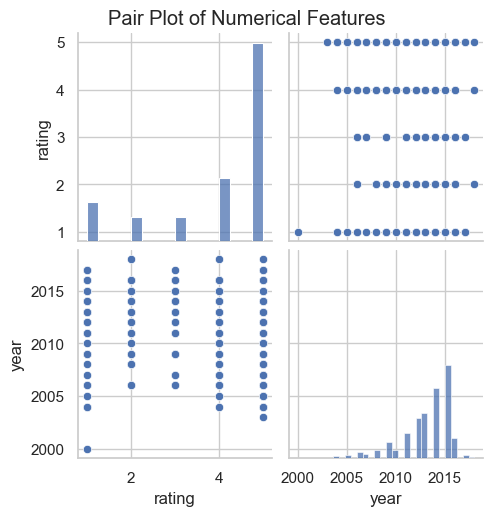

In [57]:
# Sample data for pairplot (to keep it fast)
sample_df = data[['rating', 'year']].sample(1000, random_state=42)

sns.pairplot(sample_df)
plt.suptitle("Pair Plot of Numerical Features", y=1.02)
plt.show()


# **4. Methodology**
# Based on your initial exploration, propose a methodology for further analysis. If your project involves building a machine learning model, describe the type of model you plan to use (e.g., regression, classification) and why it&#39;s suitable for your chosen task.

**Project Goal:** 

The goal of this project is to build a **Product Recommendation System** that suggests electronics items to users based on their past interactions (ratings) and possibly item metadata (e.g., category, brand).

We will implement and compare three different recommendation strategies:

**1. Item-Based Collaborative Filtering (Memory-Based):**
This approach identifies items that are similar based on user ratings and recommends items that are similar to the ones a user has already liked.

  1. Technique: Cosine Similarity between item vectors.
  2. Tools: pandas, sklearn.metrics.pairwise.cosine_similarity
  3. Use Case: Simple and effective when item behavior is consistent across users.

**2. User-Based Collaborative Filtering (Memory-Based):**
This method finds users with similar rating patterns and recommends items that those similar users liked but the target user hasn't rated yet.

  1. Technique: Cosine Similarity between users, based on the user-item matrix.
  2. Tools: pandas, sklearn.metrics.pairwise.cosine_similarity
  3. Use Case: Works well when users with similar tastes exist in the dataset.

**3. Model-Based Collaborative Filtering (Matrix Factorization - SVD):**
We will use Singular Value Decomposition (SVD) to uncover hidden patterns in user-item interactions and make personalized recommendations.

  1. Technique: Latent factor modeling using SVD.
  2. Library: Surprise (scikit-surprise)
  3. Use Case: More accurate than memory-based models, especially with sparse datasets.